# Imports

In [1]:
import os
import time
import datetime
import warnings
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
from sklearn.model_selection import train_test_split

In [84]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [85]:
plt.style.use("ggplot")

Check for cuda

In [2]:
torch.cuda.is_available()

False

Setting seeds

In [3]:
def set_seed(seed: int = 4) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [8]:
set_seed()

Random seed set as 4


## Torch basics

### squeeze()

In [10]:
x = torch.zeros(2,1,2,1)

In [11]:
x.size()

torch.Size([2, 1, 2, 1])

In [14]:
y = torch.squeeze(x)

In [15]:
y.size()

torch.Size([2, 2])

## Linear Regression

### Creating dataset

In [19]:
weight = 0.75
bias = 0.25

start = 0
end = 1
step = 0.004
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [20]:
len(X), len(y)

(250, 250)

In [21]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0040],
         [0.0080],
         [0.0120],
         [0.0160]]),
 tensor([[0.2500],
         [0.2530],
         [0.2560],
         [0.2590],
         [0.2620]]))

### Splitting the data into train and test set

In [34]:
training_split = int(0.8 * len(X))

X_train, y_train = X[:training_split], y[: training_split]

X_test, y_test = X[training_split:], y[training_split:]

## Plots

In [86]:
def plot_dataset(train_data,
                 train_label,
                 test_data,
                 test_label,
                 valid_data = None,
                 valid_label = None,
                 fig_size = (10, 5),
                 predictions=None) -> None:
    plt.figure(figsize=fig_size)

    plt.scatter(train_data,
                train_label,
                c="g",
                label = "Training Data")
    
    plt.scatter(test_data,
                test_label,
                c="r",
                label = "Testing Data")
    
    if valid_data is None or valid_label is None:
        plt.scatter(valid_data,
                    valid_label,
                    c="b",
                    label = "Validation Data")
    
    if predictions is not None:
        plt.scatter(test_data,
                    predictions,
                    c="m",
                    label="Predictions")
    
    plt.legend()

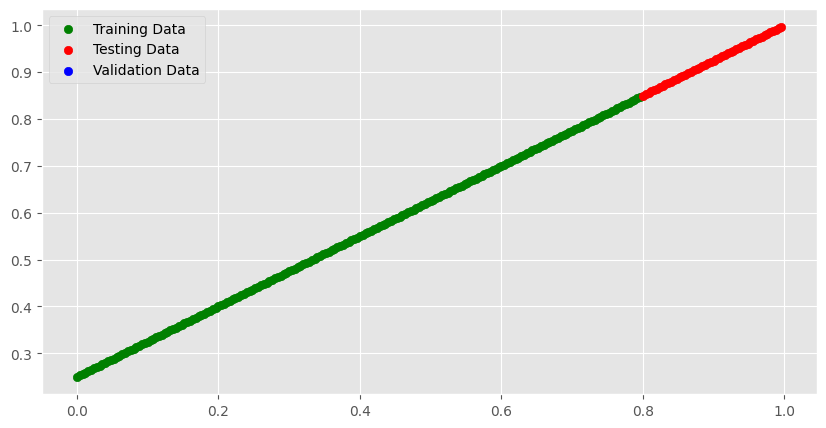

In [87]:
plot_dataset(train_data=X_train,
             train_label=y_train,
             test_data=X_test,
             test_label=y_test)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

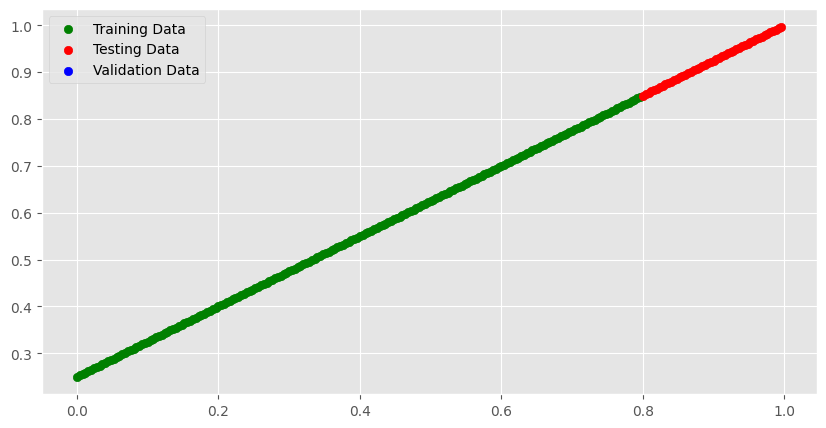

In [88]:
plot_dataset(train_data=X_train,
             train_label=y_train,
             test_data=X_test,
             test_label=y_test)

## Creating Linear Regression Model

In [67]:
class LinearRegressionModel(nn.Module):  # Wea re creating a subclass from  nn.module
    def __init__(self):
        super().__init__()

        # Initializing the model parameters: Weights and Bias
        '''
        requires_grad=True; means PyTorch will track the gradients of the specific params for use with torch.autograd, Although it is true by default

        '''
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True,
                                             dtype = torch.float))


    # Forward Pass, Here we are overwriting the forward method, given by default from nn.module
    def forward(self,
                x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias  # Formula for linear regression

In [68]:
set_seed()
lin_reg = LinearRegressionModel()

Random seed set as 4


In [69]:
lin_reg

LinearRegressionModel()

In [70]:
list(lin_reg.parameters())

[Parameter containing:
 tensor([-1.6053], requires_grad=True),
 Parameter containing:
 tensor([0.2325], requires_grad=True)]

In `inference_mode()` torch, turns off all the useful things(Such as gradient tracking) that are available during training, and only generates the inference; So it is helpful for testing our model. Because, during testing we generally don't track the gradient. 

In [92]:
with torch.inference_mode():
    y_preds = lin_reg(X_test)

In [96]:
y_preds

tensor([[-1.0517],
        [-1.0582],
        [-1.0646],
        [-1.0710],
        [-1.0774],
        [-1.0838],
        [-1.0903],
        [-1.0967],
        [-1.1031],
        [-1.1095],
        [-1.1159],
        [-1.1224],
        [-1.1288],
        [-1.1352],
        [-1.1416],
        [-1.1481],
        [-1.1545],
        [-1.1609],
        [-1.1673],
        [-1.1737],
        [-1.1802],
        [-1.1866],
        [-1.1930],
        [-1.1994],
        [-1.2058],
        [-1.2123],
        [-1.2187],
        [-1.2251],
        [-1.2315],
        [-1.2379],
        [-1.2444],
        [-1.2508],
        [-1.2572],
        [-1.2636],
        [-1.2701],
        [-1.2765],
        [-1.2829],
        [-1.2893],
        [-1.2957],
        [-1.3022],
        [-1.3086],
        [-1.3150],
        [-1.3214],
        [-1.3278],
        [-1.3343],
        [-1.3407],
        [-1.3471],
        [-1.3535],
        [-1.3599],
        [-1.3664]])

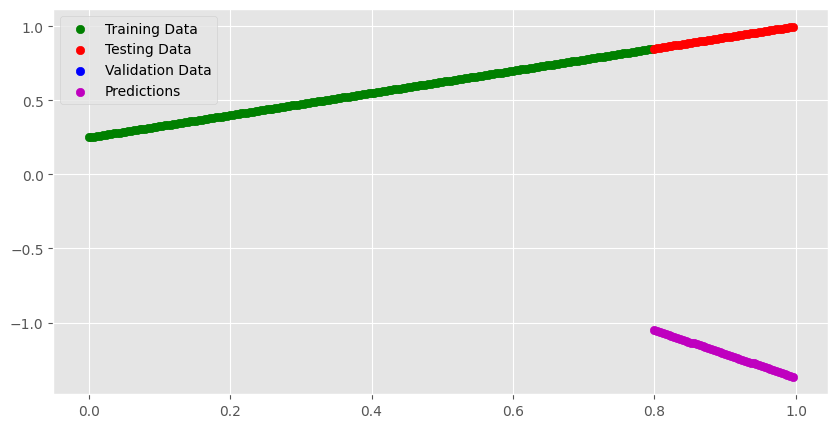

In [93]:
plot_dataset(train_data=X_train,
             train_label=y_train,
             test_data=X_test,
             test_label=y_test,
             predictions=y_preds)

Using basic training mode

In [91]:
y_pred_tr = lin_reg(X_test)

In [101]:
type(y_pred_tr)

torch.Tensor

## Loss function vs Cost function<br>
https://www.kaggle.com/discussions/general/316144<br>

**What are Loss Function and Cost Functions? Explain the key Difference Between them?**<br>

- When calculating loss we consider only a `single data point`, then we use the term `loss function.`

- Whereas, when calculating the sum of error for `multiple data` then we use the `cost function`. There is no major difference.

- In other words, the loss function is to capture the difference between the actual and predicted values for a single record whereas cost functions aggregate the difference for the entire training dataset.

In [104]:
list(lin_reg.parameters())

[Parameter containing:
 tensor([-1.6053], requires_grad=True),
 Parameter containing:
 tensor([0.2325], requires_grad=True)]

In [105]:
lin_reg.state_dict()

OrderedDict([('weights', tensor([-1.6053])), ('bias', tensor([0.2325]))])

Loss function

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(lin_reg.parameters(),
                            lr=0.001)

Training Loop

In [106]:
epochs = 1

In [ ]:
for i in range(epochs):
    lin_reg.train()